In [58]:
from sklearn import tree
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
import pandas as pd
import math
import numpy as np
df = pd.read_csv('Train.csv')
df

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [59]:
df.loc[df.Subject_Car_Colour.isna()]

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
5,ID_00D3EF6,2010-10-21,2011-10-20,Male,37,2010-10-21,2,NaN,NaN,NaN,NaN,NaN,Car Classic,0
6,ID_00HHZ8Y,2010-08-02,2011-08-01,Female,40,2010-08-02,3,NaN,NaN,NaN,Ikeja,Lagos,CVTP,0
7,ID_00M1X6U,2010-09-12,2011-09-11,Male,43,2010-09-12,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12070,ID_ZYYEGH8,2010-07-10,2011-04-20,Male,38,2010-07-10,2,Saloon,NaN,TOYOTA,NaN,NaN,Car Classic,1
12071,ID_ZZ0TC4R,2010-04-09,2011-04-08,Male,70,2010-04-09,3,Saloon,NaN,Kia,Port-Harcourt,Port-Harcourt,Car Classic,0
12072,ID_ZZ2U7VF,2010-09-16,2011-09-15,Male,38,2010-09-16,1,NaN,NaN,NaN,Obia/Akpor,Obia-Akpor,Car Classic,0
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0


In [60]:
df.groupby(['Subject_Car_Colour'],axis=0).mean()
print(5117+6962)

12079


In [61]:
df.loc[df.Gender == 'SEX'].Subject_Car_Colour.isna().sum()

35

In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [63]:
var_names = pd.read_csv('VariableDefinitions.csv')
var_names

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [64]:
car_category_set = set(df.Car_Category)
dict_index = [i for i in range(len(car_category_set))]
car_category_dict = {a:b for a,b in zip(car_category_set,dict_index)}

def dict_replace_func(data):
    new_set = set(data)
    res_index = [j for j in range(1,len(new_set)+1)]
    return {x:y for x,y in zip(new_set,res_index)}

elem = list(dict_replace_func(df.Subject_Car_Colour).keys())[12]

In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [66]:
for col in df1.columns:
    print('{} : {}'.format(col,df1[col].unique()))

df1

ID : [0.00000000e+00 8.27951648e-05 1.65590330e-04 ... 9.99834410e-01
 9.99917205e-01 6.12403101e-01]
Gender : [0.42857143 0.14285714 0.         0.28571429 0.6124031  0.57142857
 0.71428571 0.85714286]
Age : [0.16216216 0.82432432 0.33783784 0.36486486 0.02702703 0.25675676
 0.2972973  0.71621622 0.54054054 0.44594595 0.27027027 0.85135135
 0.68918919 0.17567568 0.7027027  0.21621622 0.31081081 0.39189189
 0.24324324 0.37837838 0.40540541 0.28378378 0.60810811 0.32432432
 0.12162162 0.62162162 0.43243243 0.47297297 0.2027027  0.06756757
 0.18918919 0.55405405 0.56756757 0.45945946 0.48648649 0.35135135
 0.81081081 0.13513514 0.14864865 0.52702703 0.63513514 0.22972973
 0.74324324 0.51351351 0.5        0.10810811 0.41891892 0.
 0.59459459 0.09459459 0.58108108 0.72972973 0.86486486 0.66216216
 0.67567568 0.04054054 0.78378378 0.08108108 0.64864865 0.98648649
 0.05405405 0.7972973  0.01351351 0.83783784 0.95945946 0.75675676
 0.77027027 0.89189189 0.97297297 0.91891892 0.87837838 0.90540

,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0.000000,0.428571,0.162162,0.000000,0.000000,0.500,0.088889,0.905405,0.612403,0.612403,0.125000,0
1,0.000083,0.142857,0.824324,0.166667,0.000000,0.125,0.577778,0.905405,0.612403,0.612403,0.125000,1
2,0.000166,0.428571,0.337838,0.500000,0.000000,0.500,0.711111,0.905405,0.612403,0.612403,0.125000,0
3,0.000248,0.428571,0.364865,0.333333,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
4,0.000331,0.000000,0.027027,0.500000,0.285714,0.500,0.155556,0.612403,0.608527,0.657658,0.612403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.999669,0.142857,0.162162,0.833333,0.000000,0.500,0.088889,0.783784,0.399225,0.414414,0.125000,1
12075,0.999752,0.142857,0.554054,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.125000,0
12076,0.999834,0.428571,0.216216,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
12077,0.999917,0.612403,0.364865,0.333333,0.142857,0.500,0.844444,0.905405,0.957364,0.657658,0.000000,0


In [67]:
df1 = pd.read_csv('Train.csv')

#Removing rows with age > 100: (not good)
#df1 = df1.loc[(df1.Age < 100)]




#Replacing age by the mean of other ages if 100<age or 18>age
ages_mean = np.mean([i for i in df1.Age if i>=18])



df1.Age = df1.Age.replace([j for j in df1.Age if (j < 18 or j > 100)],ages_mean)

df1.Age = df1.Age.apply(lambda x: int(x))

for i in df1.columns:
    #Replacing dates with their corresponding days in the week
    
    if i != 'target':
        if 'Date' in i:
            df1[i] = df1[i].apply(lambda y: pd.Timestamp(y).day_name())
        #Replacing strings with their corresponding integers (to be understanded by models) (without label encoder)
        """if i != 'Age' and i != 'No_Pol' and i != 'target':
            df1[i] = df1[i].replace(dict_replace_func(df1[i]))"""

        #Same thing Using Label encoder:
        df1[i] = LabelEncoder().fit_transform(df1[i])

df1 = minmax_scaling(df1,columns=[i for i in df.columns if i != 'target'])


#Replacing car_category nan values by the mean:
car_category_mean = np.median([i for i in df1.Car_Category if i != 1])

df1.Car_Category = df1.Car_Category.replace([1],(car_category_mean))

#Replacing car color nan values bu the mean:
car_colour_mean = np.median([i for i in df1.Subject_Car_Colour if i != 1])

df1.Subject_Car_Colour = df1.Subject_Car_Colour.replace([1],(car_colour_mean))

#Replacing state nan values with the mean/median:
state_mean = np.mean([i for i in df1.State if i != 1])

df1.State = df1.State.replace([i],state_mean)

#Removing State feature
#df1 = df1.loc[:,[i for i in df1.columns if i != 'State']]

#Removing Car category and car colour features (lgb score : 0.17)
#df1 = df1.loc[:,[i for i in df.columns if (i != 'Car_Category')]]

#Removing LGA_Name feature : 0.1955
#df1 = df1.loc[:,[i for i in df.columns if i != 'LGA_Name']]

#Removing LGA_Name outliers (unique citys that will not help our model)
#outliers_list = [i for i in df1.LGA_Name if df1.LGA_Name.value_counts()[i] < 3]
#df1.drop(df1.loc[outliers_list].index,inplace=True)

#Replacing LGA_Name feature with the mean 0.2070 :
lga_name_median = np.median([i for i in df1.LGA_Name if i != 1])

df1 = df1.replace([1],lga_name_median)

#Removing rows with gender SEX (doesn't afect the score):
#df1 = df1.loc[df1.Gender != 4]


# and i != 'Subject_Car_Colour'
#i != 'Car_Category' and """

#Adding target row (it was removed in the minmax scaling)
df1['target'] = [j for j in df.target]

df1 = df1.drop(columns=['Policy Start Date','Policy End Date'])
df1

,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0.000000,0.428571,0.162162,0.000000,0.000000,0.500,0.088889,0.905405,0.612403,0.612403,0.125000,0
1,0.000083,0.142857,0.824324,0.166667,0.000000,0.125,0.577778,0.905405,0.612403,0.612403,0.125000,1
2,0.000166,0.428571,0.337838,0.500000,0.000000,0.500,0.711111,0.905405,0.612403,0.612403,0.125000,0
3,0.000248,0.428571,0.364865,0.333333,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
4,0.000331,0.000000,0.027027,0.500000,0.285714,0.500,0.155556,0.612403,0.608527,0.657658,0.612403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.999669,0.142857,0.162162,0.833333,0.000000,0.500,0.088889,0.783784,0.399225,0.414414,0.125000,1
12075,0.999752,0.142857,0.554054,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.125000,0
12076,0.999834,0.428571,0.216216,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
12077,0.999917,0.612403,0.364865,0.333333,0.142857,0.500,0.844444,0.905405,0.957364,0.657658,0.000000,0


In [68]:
{df1.Subject_Car_Colour[i]:df.Subject_Car_Colour[i] for i in range(6)}
df1

,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0.000000,0.428571,0.162162,0.000000,0.000000,0.500,0.088889,0.905405,0.612403,0.612403,0.125000,0
1,0.000083,0.142857,0.824324,0.166667,0.000000,0.125,0.577778,0.905405,0.612403,0.612403,0.125000,1
2,0.000166,0.428571,0.337838,0.500000,0.000000,0.500,0.711111,0.905405,0.612403,0.612403,0.125000,0
3,0.000248,0.428571,0.364865,0.333333,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
4,0.000331,0.000000,0.027027,0.500000,0.285714,0.500,0.155556,0.612403,0.608527,0.657658,0.612403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.999669,0.142857,0.162162,0.833333,0.000000,0.500,0.088889,0.783784,0.399225,0.414414,0.125000,1
12075,0.999752,0.142857,0.554054,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.125000,0
12076,0.999834,0.428571,0.216216,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
12077,0.999917,0.612403,0.364865,0.333333,0.142857,0.500,0.844444,0.905405,0.957364,0.657658,0.000000,0


car category : nan = 1


,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0.000000,0.428571,0.162162,0.000000,0.000000,0.500,0.088889,0.905405,0.612403,0.612403,0.125000,0
1,0.000083,0.142857,0.824324,0.166667,0.000000,0.125,0.577778,0.905405,0.612403,0.612403,0.125000,1
2,0.000166,0.428571,0.337838,0.500000,0.000000,0.500,0.711111,0.905405,0.612403,0.612403,0.125000,0
3,0.000248,0.428571,0.364865,0.333333,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
4,0.000331,0.000000,0.027027,0.500000,0.285714,0.500,0.155556,0.612403,0.608527,0.657658,0.612403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.999669,0.142857,0.162162,0.833333,0.000000,0.500,0.088889,0.783784,0.399225,0.414414,0.125000,1
12075,0.999752,0.142857,0.554054,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.125000,0
12076,0.999834,0.428571,0.216216,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
12077,0.999917,0.612403,0.364865,0.333333,0.142857,0.500,0.844444,0.905405,0.957364,0.657658,0.000000,0


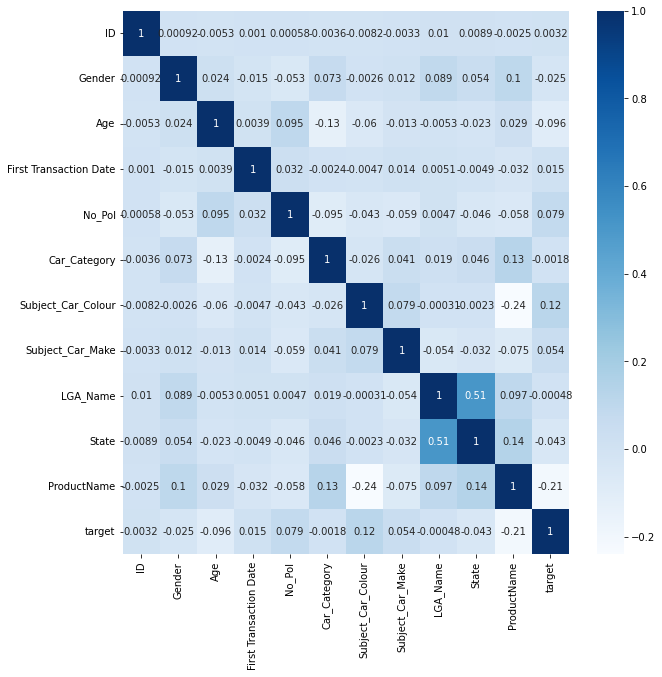

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),cbar=True,annot=True,cmap='Blues')
df1

<AxesSubplot:>

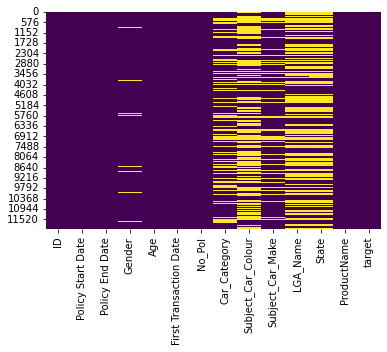

In [70]:

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')


In [71]:
df1

,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0.000000,0.428571,0.162162,0.000000,0.000000,0.500,0.088889,0.905405,0.612403,0.612403,0.125000,0
1,0.000083,0.142857,0.824324,0.166667,0.000000,0.125,0.577778,0.905405,0.612403,0.612403,0.125000,1
2,0.000166,0.428571,0.337838,0.500000,0.000000,0.500,0.711111,0.905405,0.612403,0.612403,0.125000,0
3,0.000248,0.428571,0.364865,0.333333,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
4,0.000331,0.000000,0.027027,0.500000,0.285714,0.500,0.155556,0.612403,0.608527,0.657658,0.612403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.999669,0.142857,0.162162,0.833333,0.000000,0.500,0.088889,0.783784,0.399225,0.414414,0.125000,1
12075,0.999752,0.142857,0.554054,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.125000,0
12076,0.999834,0.428571,0.216216,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
12077,0.999917,0.612403,0.364865,0.333333,0.142857,0.500,0.844444,0.905405,0.957364,0.657658,0.000000,0


In [72]:
"""for i in df1.columns:
    primary = df1[i]
    plt.figure(figsize=(8,8))
    chart = sns.countplot(data=df1,x=i,hue='target',palette='GnBu')

df1"""

df1

,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0.000000,0.428571,0.162162,0.000000,0.000000,0.500,0.088889,0.905405,0.612403,0.612403,0.125000,0
1,0.000083,0.142857,0.824324,0.166667,0.000000,0.125,0.577778,0.905405,0.612403,0.612403,0.125000,1
2,0.000166,0.428571,0.337838,0.500000,0.000000,0.500,0.711111,0.905405,0.612403,0.612403,0.125000,0
3,0.000248,0.428571,0.364865,0.333333,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
4,0.000331,0.000000,0.027027,0.500000,0.285714,0.500,0.155556,0.612403,0.608527,0.657658,0.612403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.999669,0.142857,0.162162,0.833333,0.000000,0.500,0.088889,0.783784,0.399225,0.414414,0.125000,1
12075,0.999752,0.142857,0.554054,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.125000,0
12076,0.999834,0.428571,0.216216,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
12077,0.999917,0.612403,0.364865,0.333333,0.142857,0.500,0.844444,0.905405,0.957364,0.657658,0.000000,0


In [73]:
df1

,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0.000000,0.428571,0.162162,0.000000,0.000000,0.500,0.088889,0.905405,0.612403,0.612403,0.125000,0
1,0.000083,0.142857,0.824324,0.166667,0.000000,0.125,0.577778,0.905405,0.612403,0.612403,0.125000,1
2,0.000166,0.428571,0.337838,0.500000,0.000000,0.500,0.711111,0.905405,0.612403,0.612403,0.125000,0
3,0.000248,0.428571,0.364865,0.333333,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
4,0.000331,0.000000,0.027027,0.500000,0.285714,0.500,0.155556,0.612403,0.608527,0.657658,0.612403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.999669,0.142857,0.162162,0.833333,0.000000,0.500,0.088889,0.783784,0.399225,0.414414,0.125000,1
12075,0.999752,0.142857,0.554054,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.125000,0
12076,0.999834,0.428571,0.216216,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
12077,0.999917,0.612403,0.364865,0.333333,0.142857,0.500,0.844444,0.905405,0.957364,0.657658,0.000000,0


In [74]:

from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier


x = df1.iloc[:,:-1]
y = df1['target']


X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.3, random_state=2020,shuffle=True)

my_list = []



my_fold = KFold(n_splits = 5,random_state=2020,shuffle = True)
score = score2 = score3 = score4 = 0
#model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,min_child_weight=6)
model2 = xgb.XGBClassifier()
model3 =CatBoostClassifier(iterations=220,od_type="Iter",l2_leaf_reg=5,learning_rate=0.5,verbose=0, depth=10)
model4 = RandomForestClassifier(n_estimators=400)

for i,(train_index,test_index) in enumerate(my_fold.split(x)):
    X_train, Y_train = x.iloc[train_index], y.iloc[train_index]
    X_test, Y_test = x.iloc[test_index], y.iloc[test_index]
    
#    vote_model = VotingClassifier(estimators = [('lgbm',model),('xgb',model2),('dt',model3),('randomforest',model4)],voting='soft')
    model = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,learning_rate=0.8,min_child_weight=9)

    model.fit(X_train,Y_train)
    """model2.fit(X_train,Y_train)
    model3.fit(X_train,Y_train)
    model4.fit(X_train,Y_train)"""

 #   vote_model.fit(X_train,Y_train)

    y_pred = model.predict(X_test)
    """y_pred2 = model2.predict(X_test)
    y_pred3 = model2.predict(X_test)
    y_pred4 = model2.predict(X_test)"""

  #  y_pred = vote_model.predict(X_test)
   
    
    score += f1_score(y_pred,Y_test)/5
    """score2 += f1_score(Y_test,y_pred2)/5
    score3 += f1_score(Y_test,y_pred3)/5
    score4 += f1_score(Y_test,y_pred4)/5"""

#    score += f1_score(Y_test,y_pred)/5


print('Light GBM :',score)
"""print('XGboost :',score2)
print('Cat boost :',score3)
print('Random Forest :',score4)"""

#score


Light GBM : 0.2611412665201226


"print('XGboost :',score2)\nprint('Cat boost :',score3)\nprint('Random Forest :',score4)"




last score : 0.25


    features count  f1_score      score function
0              1.0     0.082          chi square
1              2.0     0.082          chi square
2              3.0     0.085          chi square
3              4.0     0.183          chi square
4              5.0     0.228          chi square
5              6.0     0.213          chi square
6              7.0     0.251          chi square
7              8.0     0.252          chi square
8              9.0     0.274          chi square
9             10.0     0.240          chi square
10             1.0     0.082               anova
11             2.0     0.082               anova
12             3.0     0.153               anova
13             4.0     0.183               anova
14             5.0     0.228               anova
15             6.0     0.213               anova
16             7.0     0.251               anova
17             8.0     0.252               anova
18             9.0     0.274               anova
19            10.0  

<AxesSubplot:xlabel='features count', ylabel='f1_score'>

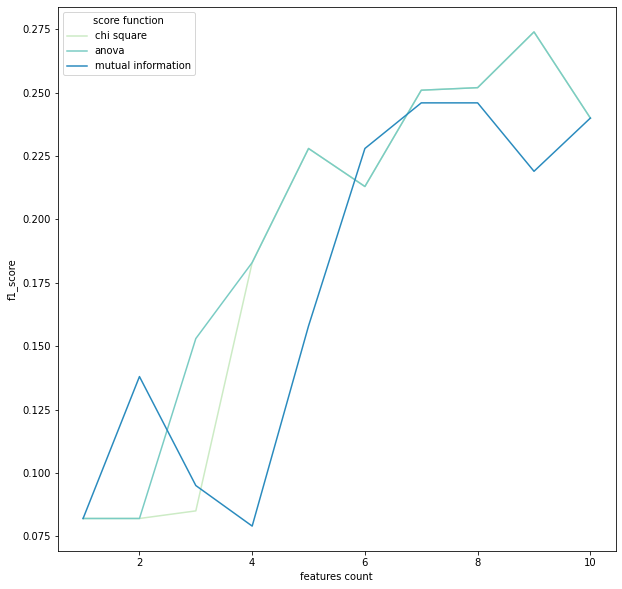

In [79]:
from sklearn. feature_selection import SelectKBest
from sklearn. feature_selection import chi2
from sklearn. feature_selection import f_classif
from sklearn. feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.3, random_state=2020,shuffle=True)
variable_counts = 11
# define feature selection - filter methods function
def feature_selection(variable_counts, score_function) :
    selection_model = SelectKBest(score_func=score_function, k=variable_counts) # create a selection model based on the score function
    selection = selection_model.fit(X_train, Y_train) # fit the selection to the data
    features_selected = X_train.columns[selection.get_support()] # get the selected variables
    X_train_selected = selection_model.fit_transform(X_train, Y_train) # transform the trainig data based on selected features
    # calculate the accuracy of prediction based on selected features
    reg = lgb.LGBMClassifier(n_estimators=220,num_leaves=100,max_depth=10,learning_rate=0.8,min_child_weight=9)
    reg.fit(X_train_selected, Y_train)
    y_pred = reg.predict(X_test[features_selected])
    return metrics.f1_score(Y_test , y_pred)

f1_score_df = pd.DataFrame({"features count":[],"f1_score": [], "score function": []})
function_list = [chi2, f_classif,mutual_info_classif]
function_name = ["chi square","anova","mutual information"]
for j in range(len(function_list)) :
    func = function_list[j]
    func_name = function_name[j]
    for i in range(1, len(df1.columns)- 1):
        f1_score = feature_selection(i, func)
        new_record = {"features count": round(i), "f1_score": round (f1_score, 3),"score function": func_name}
        f1_score_df = f1_score_df.append(new_record, ignore_index = True)
print (f1_score_df)
plt.figure(figsize = (10, 10))
sns.lineplot(data = f1_score_df, x="features count",y="f1_score", hue ="score function", palette = "GnBu")

In [76]:
modell = tree.DecisionTreeClassifier()
modell.fit(X_train,Y_train)

DecisionTreeClassifier()

In [77]:

df1

,ID,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0.000000,0.428571,0.162162,0.000000,0.000000,0.500,0.088889,0.905405,0.612403,0.612403,0.125000,0
1,0.000083,0.142857,0.824324,0.166667,0.000000,0.125,0.577778,0.905405,0.612403,0.612403,0.125000,1
2,0.000166,0.428571,0.337838,0.500000,0.000000,0.500,0.711111,0.905405,0.612403,0.612403,0.125000,0
3,0.000248,0.428571,0.364865,0.333333,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
4,0.000331,0.000000,0.027027,0.500000,0.285714,0.500,0.155556,0.612403,0.608527,0.657658,0.612403,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.999669,0.142857,0.162162,0.833333,0.000000,0.500,0.088889,0.783784,0.399225,0.414414,0.125000,1
12075,0.999752,0.142857,0.554054,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.125000,0
12076,0.999834,0.428571,0.216216,0.500000,0.000000,0.500,0.155556,0.612403,0.612403,0.612403,0.625000,0
12077,0.999917,0.612403,0.364865,0.333333,0.142857,0.500,0.844444,0.905405,0.957364,0.657658,0.000000,0


In [78]:
model3 = lgb.LGBMClassifier(n_estimators=222)

model3.fit(X_train,Y_train)

y_pred3 = model3.predict(X_test)

f1_score(Y_test,y_pred3)

TypeError: 'numpy.float64' object is not callable

In [ ]:
model4 = xgb.XGBClassifier()

model4.fit(X_train,Y_train)

y_pred4 = model4.predict(X_test)

f1_score(Y_test,y_pred4)

0.19047619047619047

In [ ]:
df

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [ ]:
df.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


remove car color : Done

replace car color and car category with mean : Done

deal with LGA_name : Done


remove SEX : Done

Try median (best parameters found : lga_name : median | car_category : mean| car_colour : median) (added 0.02 to my score )

Feature modeling : Doing rn

deal with state

lgb hyperparameters

Voting Classifier

Automatic feature adding algorithm